In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df = pd.read_csv('data.csv')

In [105]:
df.head()

,City coffee shop,Year,Month,Product category,Sales Volume,Sales Value
0,Southampton,2020,1,Coffee,91.0,364.0
1,Southampton,2020,1,Hot drinks,46.0,92.0
2,Southampton,2020,1,Cold drinks,60.0,150.0
3,Southampton,2020,1,Cakes,23.0,115.0
4,Southampton,2020,1,Sandwiches,19.0,114.0


In [106]:
df.shape

(648, 6)

In [107]:
df[["Sales Volume", "Sales Value"]] = df[["Sales Volume", "Sales Value"]].apply(pd.to_numeric)

In [108]:
grouped_by_loc = df.groupby(["City coffee shop"]).agg({"Sales Volume": "sum", "Sales Value": "sum"})

In [109]:
grouped_by_loc.head(10)

,Sales Volume,Sales Value
City coffee shop,,
Blackpool,27515.692,89238.36
Portsmouth,19426.500,62271.75
Southampton,13338.000,42952.50


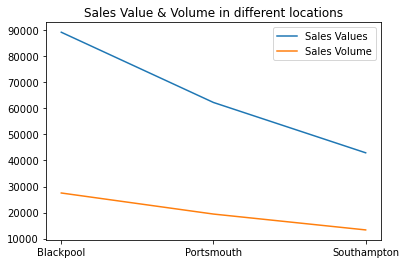

In [159]:
agg_sales_values_by_loc = grouped_by_loc['Sales Value'].values
agg_sales_volume_by_loc = grouped_by_loc['Sales Volume'].values
cities = grouped_by_loc.index.to_list()
plt.plot(cities, agg_sales_values_by_loc, label="Sales Values")
plt.plot(cities, agg_sales_volume_by_loc, label="Sales Volume")
plt.title(label="Sales Value & Volume in different locations")
plt.legend()

In [111]:
plt.close()

### Clearly, Blackpool has the highest sales value and volume and it qualifies as the best shop to invest in expanding the floor area

In [141]:
grouped_by_product = df.groupby(["Product category"]).agg({"Sales Volume": "sum", "Sales Value": "sum"})
grouped_by_product.head(10)

,Sales Volume,Sales Value
Product category,,
Cakes,5450.490,27252.450
Coffee,18262.692,73050.768
Cold drinks,12012.592,30413.980
Hot drinks,8871.912,17743.824
Pastry,12108.862,24559.724
Sandwiches,3573.644,21441.864


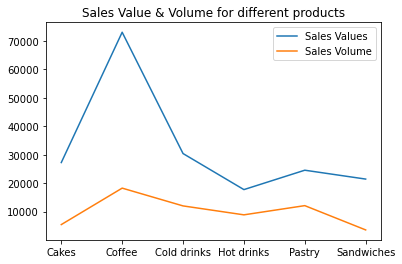

In [160]:
agg_sales_values_by_product = grouped_by_product['Sales Value'].values
agg_sales_volume_by_product = grouped_by_product['Sales Volume'].values
products = grouped_by_product.index.to_list()
plt.plot(products, agg_sales_values_by_product, label="Sales Values")
plt.plot(products, agg_sales_volume_by_product, label="Sales Volume")
plt.title(label="Sales Value & Volume for different products")
plt.legend()

In [146]:
plt.close()

### From the chart, it can be inferred that hot drinks and sandwiches are among the products with the least demand. However other parameters need to be looked into, e.g., selling price per item, cost of making an item, etc., and then the decision to discontinue an item can be taken

In [152]:
grouped_by_year_blackpool = df[df["City coffee shop"]=='Blackpool'].groupby(["Year"]).agg({"Sales Value": "sum"})
grouped_by_year_blackpool["YOY Perc. Change"] = grouped_by_year_blackpool.pct_change() * 100

In [153]:
grouped_by_year_blackpool.head()

,Sales Value,YOY Perc. Change
Year,,
2020,27252.00,NaN
2021,28601.00,4.950095
2022,33385.36,16.727947


### Year on year revenue has shot up by 16% in 2022. This can be attributed to home delivery service although other factors need to be considered. For example, due to a recovering economy after COVID demand surged and the revenue increase has been witnessed by competitors as well. In that case we cannot conclude home delivery service singlehandedly contributed to sales boost.